COVID-19 Healthy Diet Dataset7

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.preprocessing import StandardScaler
        
# Importing the dataset
dataset = pd.read_csv("E:/Medium/2 Learned/COVID-19 Healthy Diet Dataset/Protein_Supply_Quantity_Data.csv")
dataset=dataset.replace("<2.5", 0)

#dataset=dataset.dropna(inplace=True)
dataset = dataset.dropna()
dataset = dataset.reset_index(drop=True)

dataset.head()

,Country,Alcoholic Beverages,Animal Products,Animal fats,"Aquatic Products, Other",Cereals - Excluding Beer,Eggs,"Fish, Seafood",Fruits - Excluding Wine,Meat,...,Vegetables,Miscellaneous,Obesity,Undernourished,Confirmed,Deaths,Recovered,Active,Population,Unit (all except Population)
0,Afghanistan,0.0000,9.7523,0.0277,0.0,35.9771,0.4067,0.0647,0.5824,3.1337,...,1.1370,0.0462,4.5,29.8,0.142134,0.006186,0.123374,0.012574,38928000.0,%
1,Albania,0.1840,27.7469,0.0711,0.0,14.2331,1.8069,0.6274,1.2757,7.6582,...,3.2456,0.0544,22.3,6.2,2.967301,0.050951,1.792636,1.123714,2838000.0,%
2,Algeria,0.0323,13.8360,0.0054,0.0,26.5633,1.2916,0.6350,1.1624,3.5088,...,3.1267,0.1399,26.6,3.9,0.244897,0.006558,0.167572,0.070767,44357000.0,%
3,Angola,0.6285,15.2311,0.0277,0.0,20.3882,0.1756,5.4436,1.2754,7.6248,...,0.8133,0.0924,6.8,25,0.061687,0.001461,0.056808,0.003419,32522000.0,%
4,Argentina,0.1704,31.9799,0.0097,0.0,13.6702,2.0593,1.0223,0.5209,21.6250,...,1.0516,0.0000,28.5,4.6,4.356147,0.108227,3.905192,0.342729,45377000.0,%


PCA Technique

In [2]:
X_ori = dataset.iloc[:, 1:25].values
y_ori = dataset.iloc[:, 26].values

column_names=dataset.columns[1:25]

X=X_ori
y=y_ori

X = StandardScaler().fit_transform(X)

# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

X_train_ori = X_train
X_test_ori = X_test

# Applying PCA
from sklearn.decomposition import PCA
for i in range (5,0,-1):
    pca = PCA(n_components = i)
    X_train = pca.fit_transform(X_train_ori)
    X_test = pca.transform(X_test_ori)
    explained_variance = pca.explained_variance_ratio_
    print(explained_variance)
    n_pcs= pca.components_.shape[0]
    most_important = [np.abs(pca.components_[i]).argmax() for i in range(n_pcs)]
    most_important_names = [column_names[most_important[i]] for i in range(n_pcs)]
    #print(most_important)
    print(most_important_names)
    print("------")

[0.26510281 0.08990123 0.07520028 0.0712866  0.06226154]
['Animal Products', 'Fish, Seafood', 'Spices', 'Aquatic Products, Other', 'Sugar & Sweeteners']
------
[0.26510281 0.08990123 0.07520028 0.0712866 ]
['Animal Products', 'Fish, Seafood', 'Spices', 'Aquatic Products, Other']
------
[0.26510281 0.08990123 0.07520028]
['Animal Products', 'Fish, Seafood', 'Spices']
------
[0.26510281 0.08990123]
['Animal Products', 'Fish, Seafood']
------
[0.26510281]
['Animal Products']
------



It is found out that Animal Products are the most important factor( Principal Component) with explained_varianceratio of 0.25363972.

It is also found that "Vegetable Products" column is redundant.If we remove "Animal Products" feature from analysis then "Vegetable Products" becomes principle component.


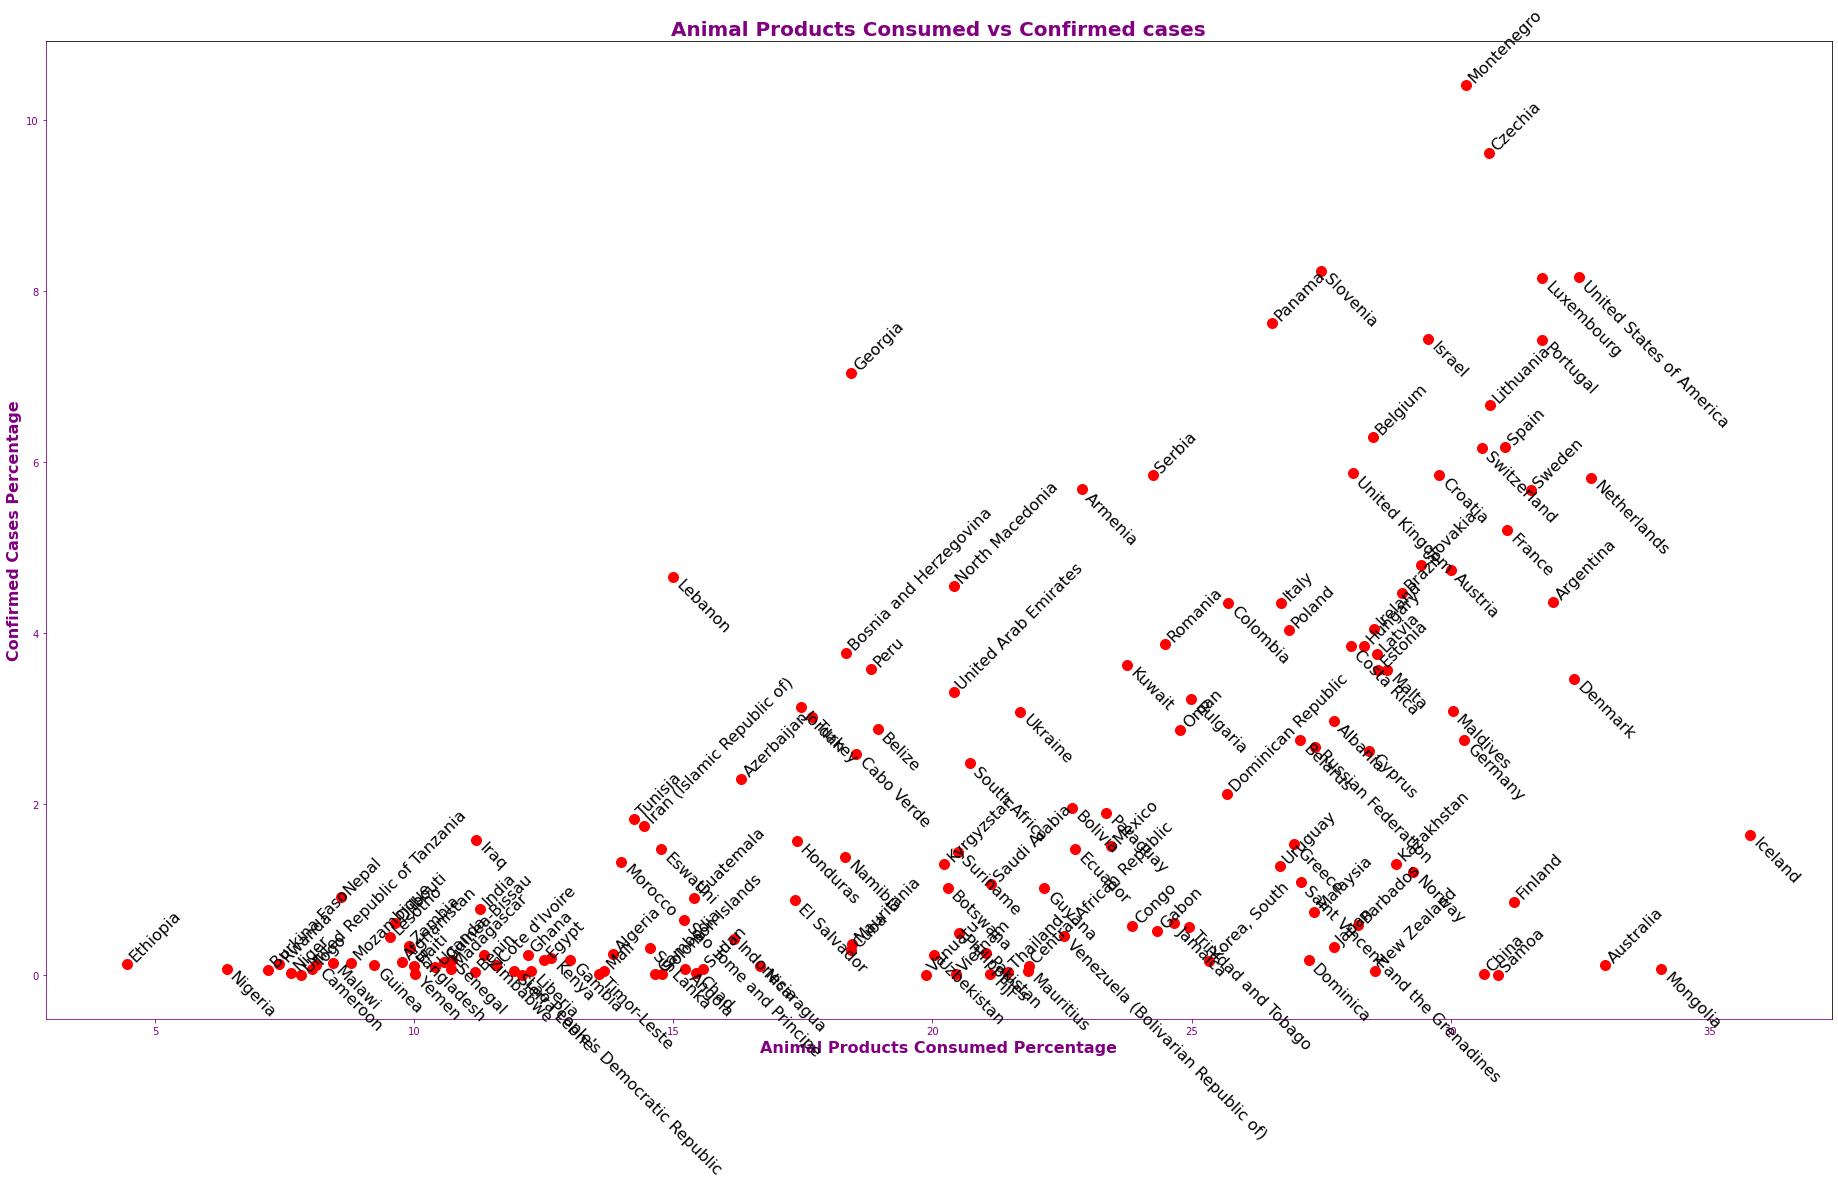

In [3]:
X_new = X_ori[:,most_important[0]]
y_new = y_ori

axes = plt.gca()
#axes.set_xlim([min(X_new[:])-.15,max(X_new[:])+.15])
#axes.set_ylim([min(y_new[:])-.09,max(y_new[:])+.001])
axes.spines["bottom"].set_color("purple")
axes.spines["left"].set_color("purple")
axes.tick_params(axis='x', colors='purple')
axes.tick_params(axis='y', colors='purple')

for i in range (0,X.shape[0]):
    plt.scatter(X_new[i], y_new[i], s = 100, c = 'red')
    if i%2 == 1:
        plt.annotate(dataset.iloc[i, 0], (X_new[i], y_new[i]), fontsize=16,rotation=-45,va='top')
    else:
        plt.annotate(dataset.iloc[i, 0], (X_new[i], y_new[i]), fontsize=16,rotation=+45,va='bottom')

plt.title(column_names[most_important[0]] +' Consumed vs Confirmed cases',fontsize=20, fontweight='bold',c = 'purple')
plt.xlabel(column_names[most_important[0]] + ' Consumed Percentage',fontsize=16, fontweight='bold',c = 'purple')
plt.ylabel('Confirmed Cases Percentage',fontsize=16, fontweight='bold',c = 'purple')

figure = plt.gcf()  # get current figure
figure.set_size_inches(32, 18) # set figure's size manually to your full screen (32x18)
plt.show()


From the above chart we can see that COVID-19 confirmed percentage is less in the contries where Animal Product Protein consumption is low like India.

Amongst the contries where Animal Product Protein consumption is high, we see confirmed percentage also high,like Spain, United States of America, Italy.

However, there are countries like Australia where confirmed percentage is low despite High % of Protein intake from Animal Product source, may be, perhaps, due to other fitness habits and wide spread population etc.


Analysis based on Confirmed Cases Percentage and Obesity Percentage

In [4]:
"""
Created on Mon May  4 16:48:47 2020

@author: rashmibh
"""

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import random

from sklearn.preprocessing import StandardScaler

# Importing the INDIA dataset
dataset = pd.read_csv("E:/Medium/2 Learned/COVID-19 Healthy Diet Dataset/Fat_Supply_Quantity_Data.csv",usecols=[0,24,26])

dataset=dataset.replace("<2.5", 0)

dataset = dataset.dropna()
dataset = dataset.reset_index(drop=True)
dataset.head()

,Country,Obesity,Confirmed
0,Afghanistan,4.5,0.142134
1,Albania,22.3,2.967301
2,Algeria,26.6,0.244897
3,Angola,6.8,0.061687
4,Antigua and Barbuda,19.1,0.293878


Used Elbow method to find optimum number of clusters. In this case, it was found that 3 is the optimum number of clusters.

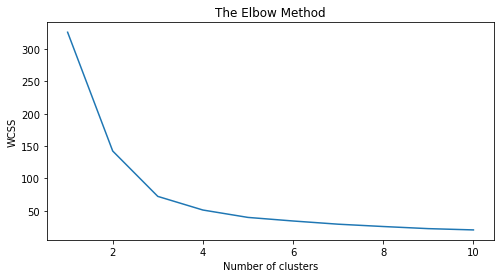

In [5]:
X = dataset.iloc[:, [1,2]].values

scalerX = StandardScaler().fit(X)
X_scaled = scalerX.transform(X)

# Using the elbow method to find the optimal number of clusters
from sklearn.cluster import KMeans
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans.fit(X_scaled)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 11), wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
#plt.show()
figure = plt.gcf()  # get current figure
figure.set_size_inches(8, 4) # set figure's size manually to your full screen (32x18)
#plt.savefig("Elbow.png", bbox_inches='tight') # bbox_inches removes extra white spaces
plt.show()
#plt.clf()

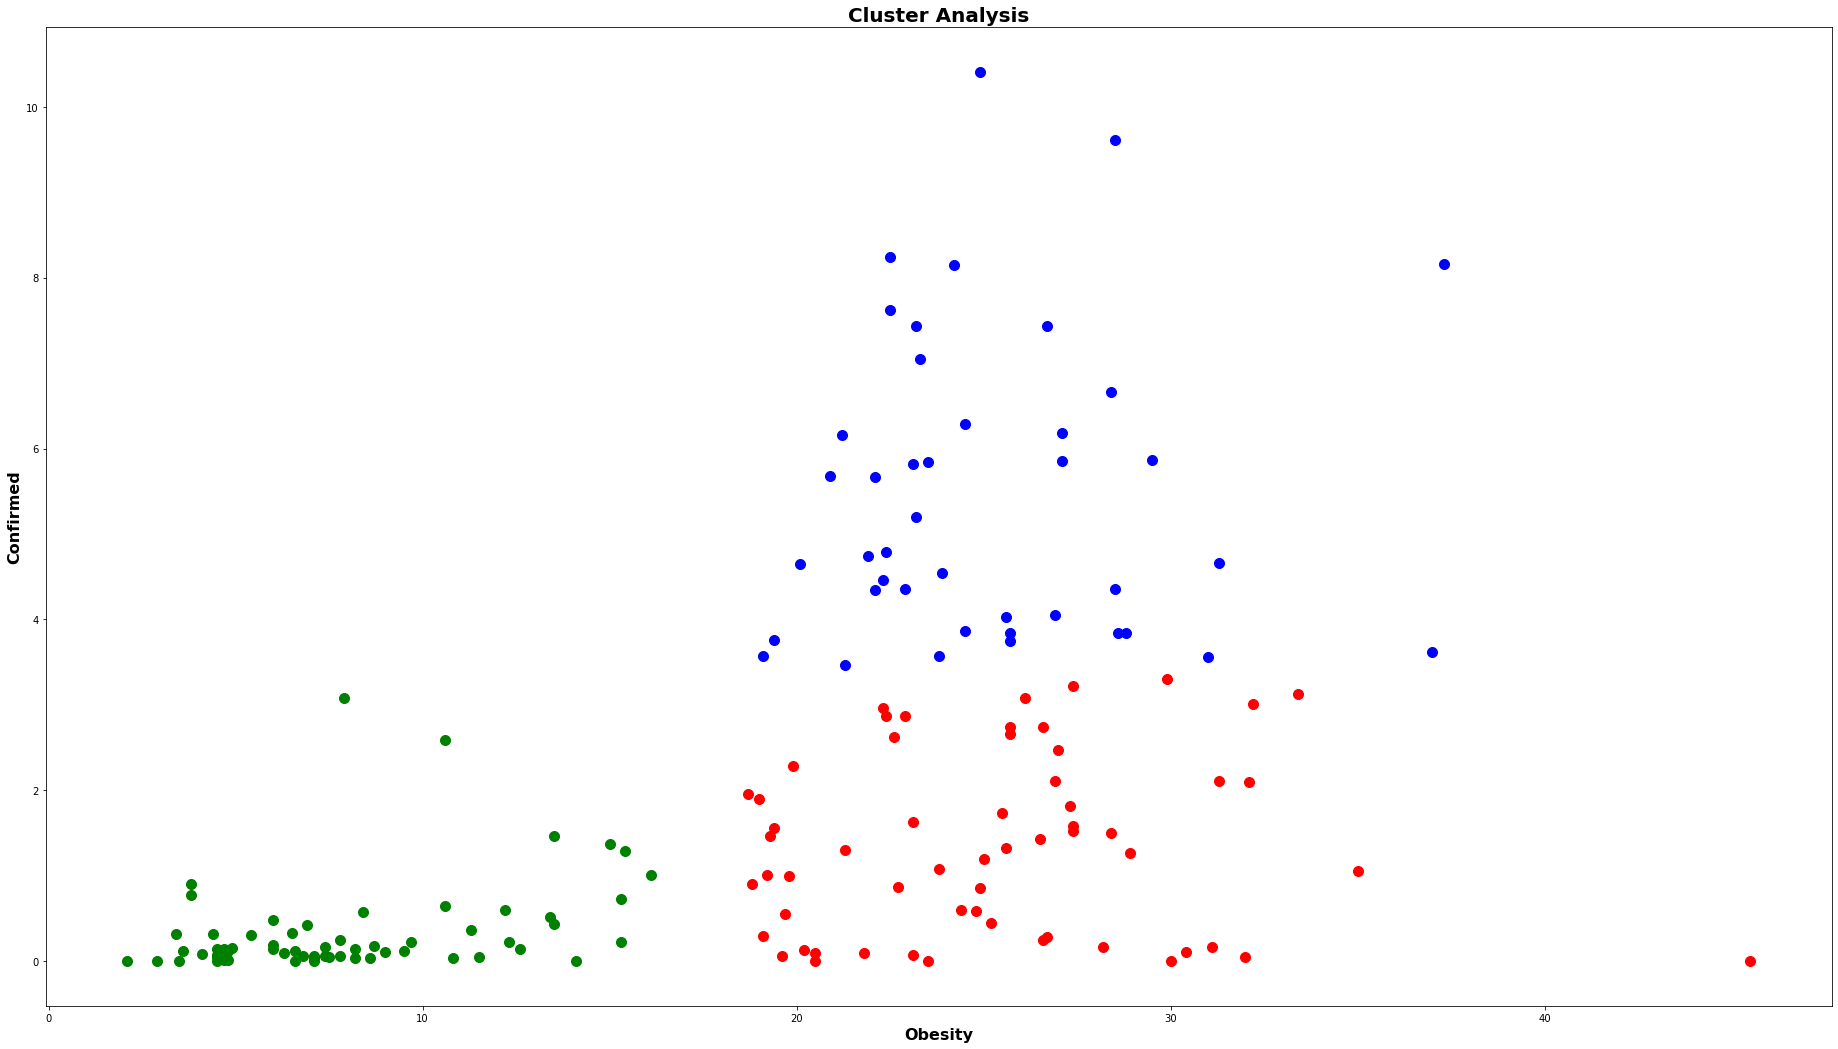

In [6]:
num_opt_clusters=3

# Fitting K-Means to the dataset
kmeans = KMeans(n_clusters = num_opt_clusters, init = 'k-means++', random_state = 42)
y_kmeans = kmeans.fit_predict(X_scaled)

original_len=dataset.shape[0]
for i in range(0,original_len):
    dataset.loc[i,"Cluster"]=y_kmeans[i]
 
#dataset.to_csv('Cluster Assignment Result.csv') 
   
plt.scatter(X[y_kmeans == 1, 0], X[y_kmeans == 1, 1], s = 100, c = 'blue', label = 'Cluster 2')
plt.scatter(X[y_kmeans == 2, 0], X[y_kmeans == 2, 1], s = 100, c = 'green', label = 'Cluster 3')
plt.scatter(X[y_kmeans == 0, 0], X[y_kmeans == 0, 1], s = 100, c = 'red', label = 'Cluster 1')
plt.title('Cluster Analysis',fontsize=20, fontweight='bold')
plt.xlabel('Obesity',fontsize=16, fontweight='bold')
plt.ylabel('Confirmed',fontsize=16, fontweight='bold')

figure = plt.gcf()  # get current figure
figure.set_size_inches(32, 18) # set figure's size manually to your full screen (32x18)
plt.show()

Cluster chart with name of the countries. 

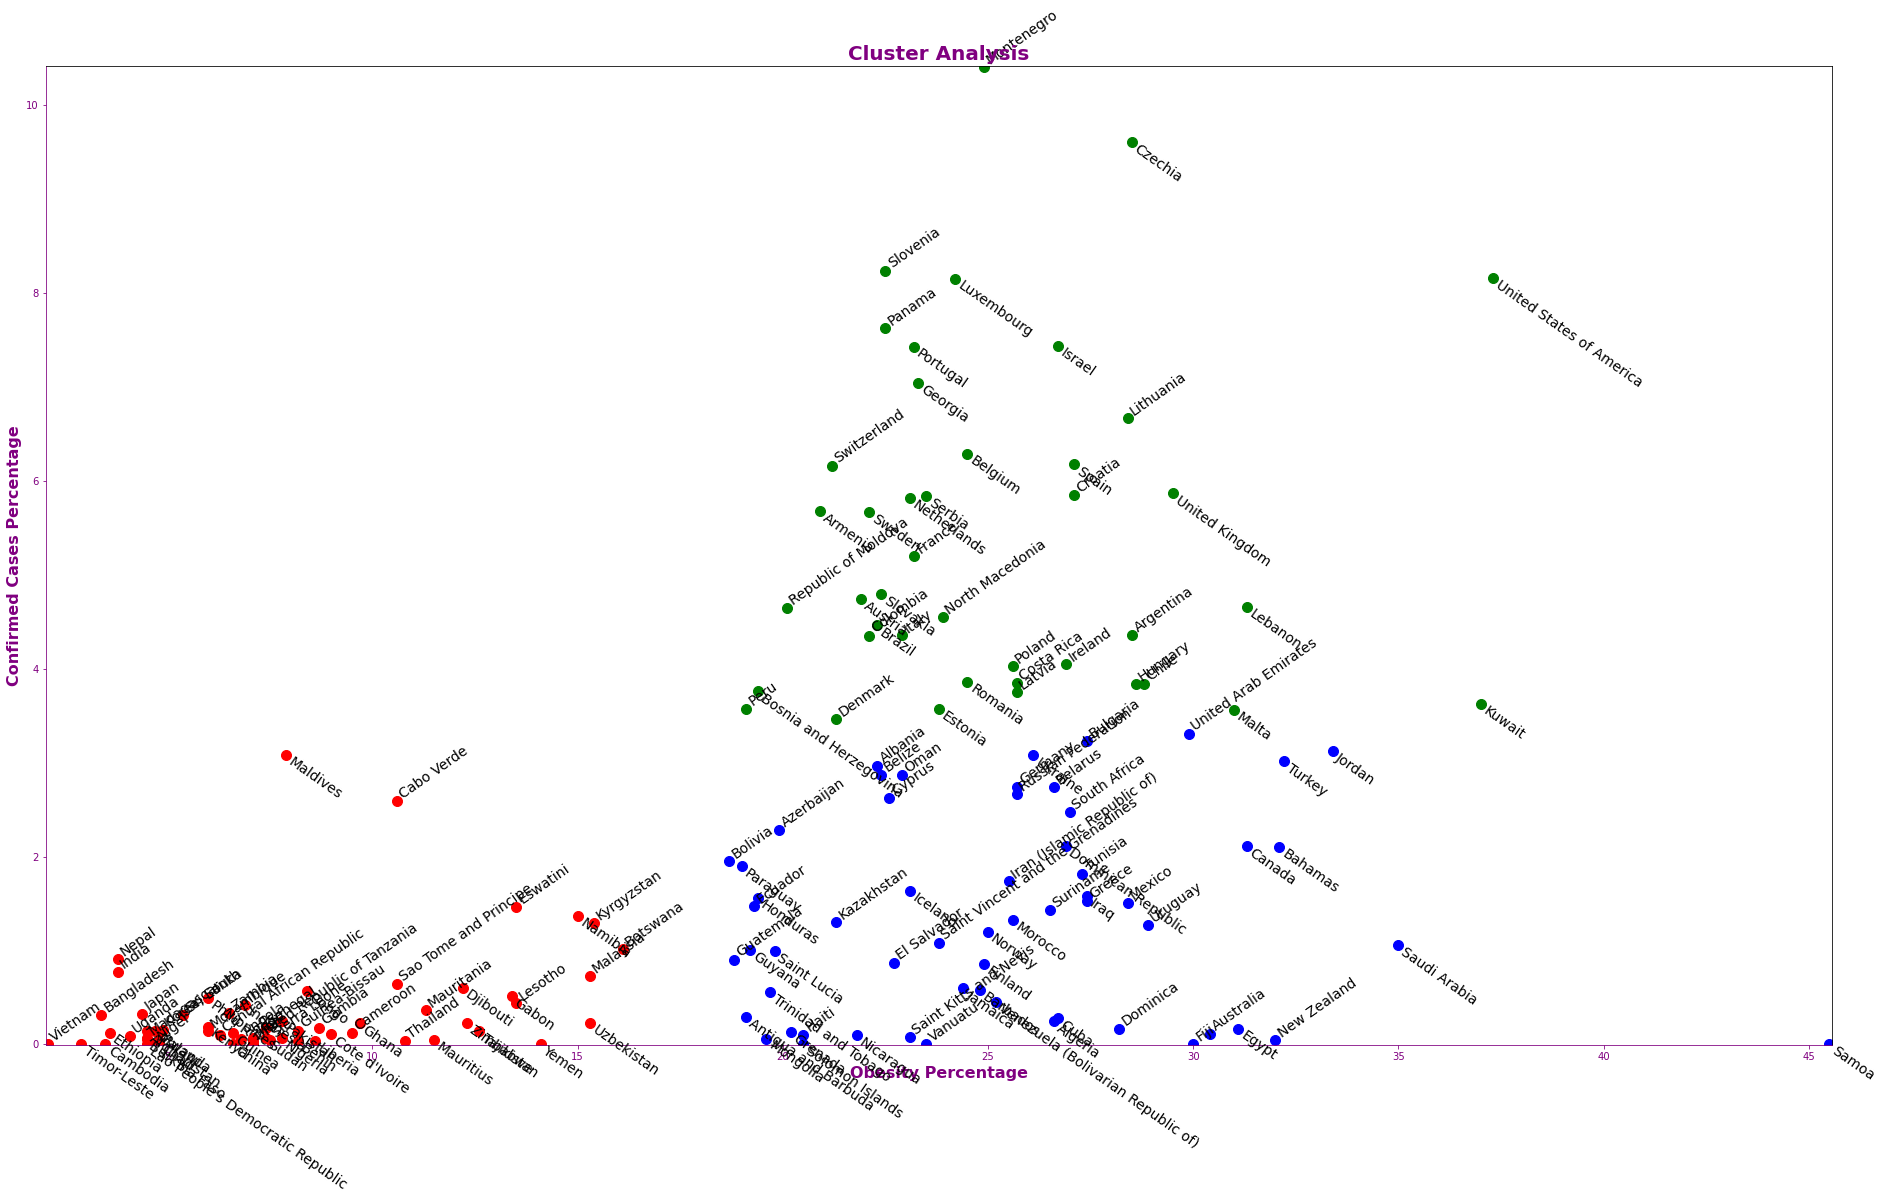

In [7]:
axes = plt.gca()
axes.set_xlim([min(X[:,0])-.05,max(X[:,0])+.05])
axes.set_ylim([min(X[:,1])-.005,max(X[:,1])+.005])
axes.spines["bottom"].set_color("purple")
axes.spines["left"].set_color("purple")
axes.tick_params(axis='x', colors='purple')
axes.tick_params(axis='y', colors='purple')
    
for i in range (0,X.shape[0]):
    if y_kmeans[i] == 1 :
        plt.scatter(X[i,0], X[i,1], s = 100, c = 'green')
    elif y_kmeans[i] == 2 :
        plt.scatter(X[i,0], X[i,1], s = 100, c = 'red')
    elif y_kmeans[i] == 0 :
        plt.scatter(X[i,0], X[i,1], s = 100, c = 'blue')
   # plt.annotate(dataset.iloc[i, 0], (X[i,0], X[i,1]))
    if i%2 == 1:
        plt.annotate(dataset.iloc[i, 0], (X[i,0], X[i,1]), fontsize=14,rotation=35,va='bottom')
    else:
        plt.annotate(dataset.iloc[i, 0], (X[i,0], X[i,1]), fontsize=14,rotation=-35,va='top')

plt.title('Cluster Analysis',fontsize=20, fontweight='bold',c = 'purple')
plt.xlabel('Obesity Percentage',fontsize=16, fontweight='bold',c = 'purple')
plt.ylabel('Confirmed Cases Percentage',fontsize=16, fontweight='bold',c = 'purple')
#plt.show()

figure = plt.gcf()  # get current figure
figure.set_size_inches(32, 18) # set figure's size manually to your full screen (32x18)
#plt.savefig("Cluster.png", bbox_inches='tight') # bbox_inches removes extra white spaces
#plt.clf()
plt.show()

Below charts provide closer look into 3 clusters.

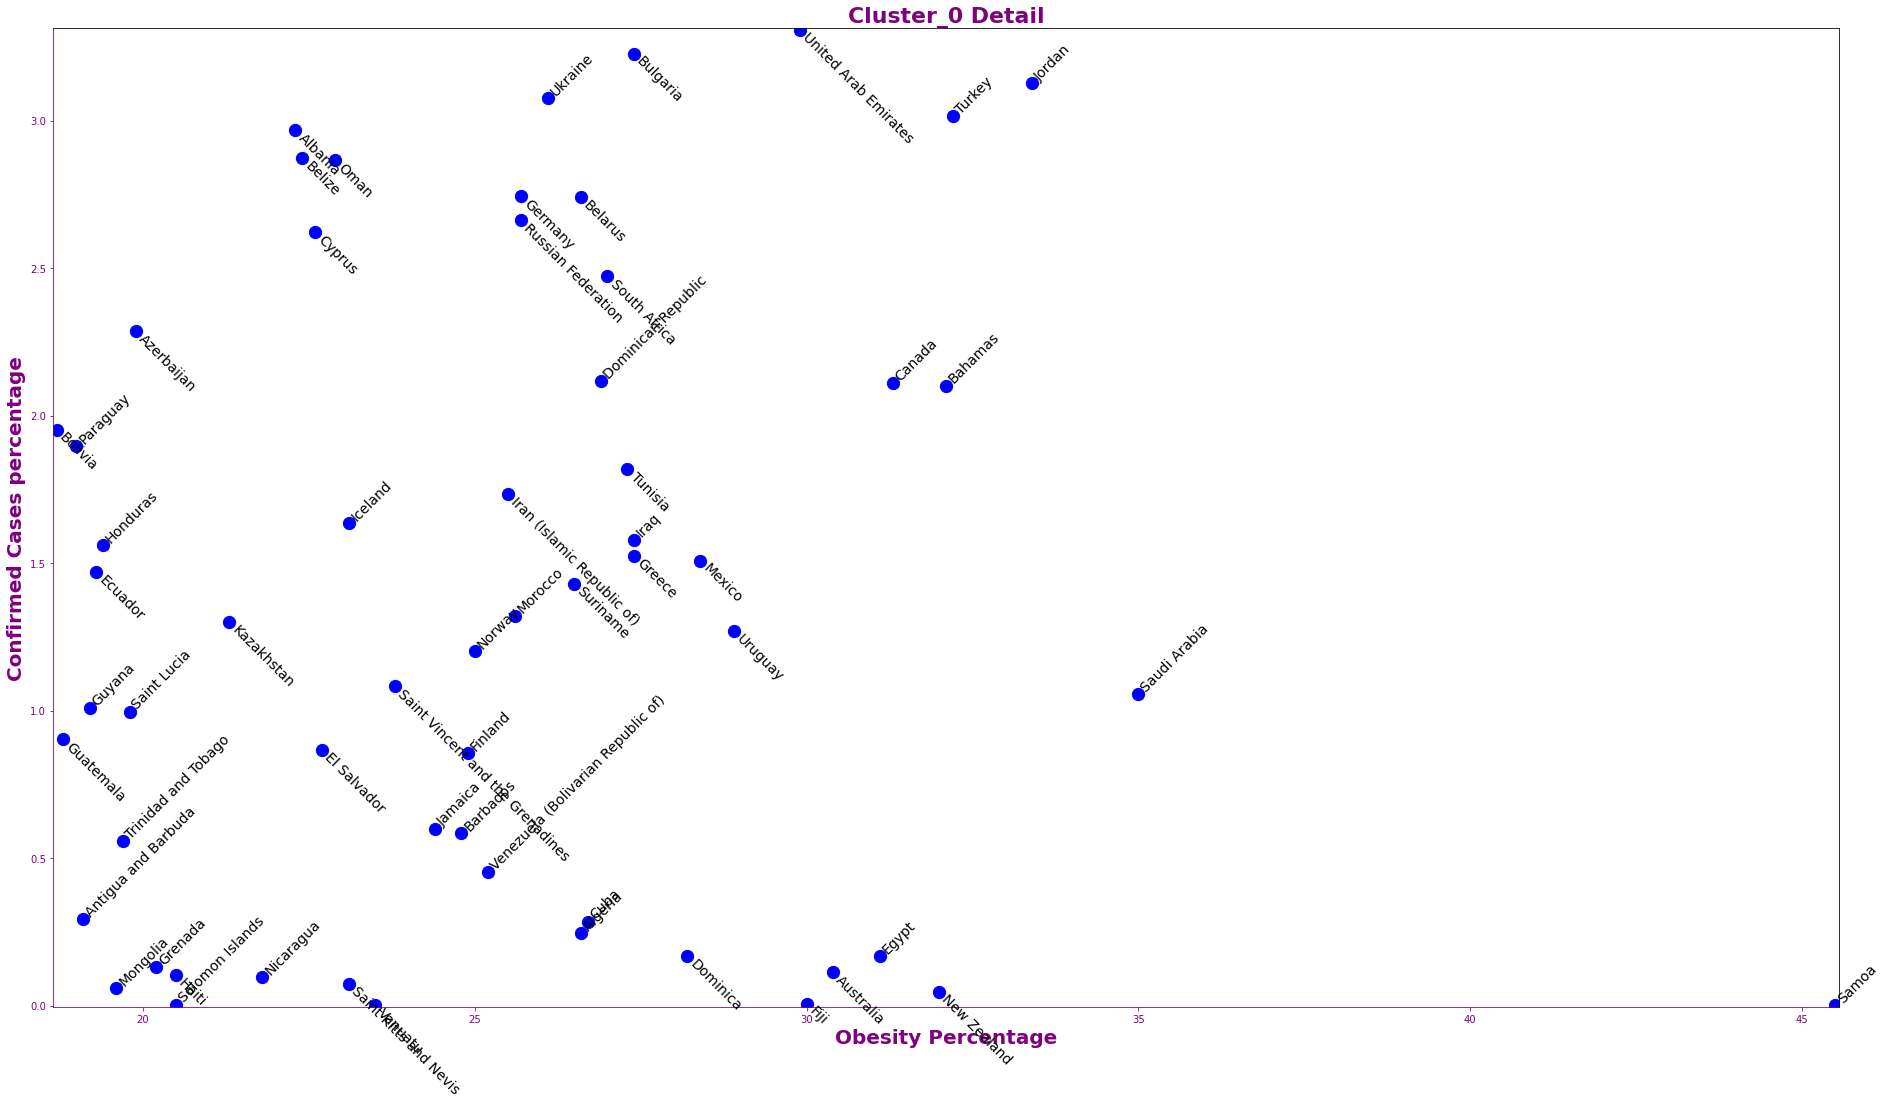

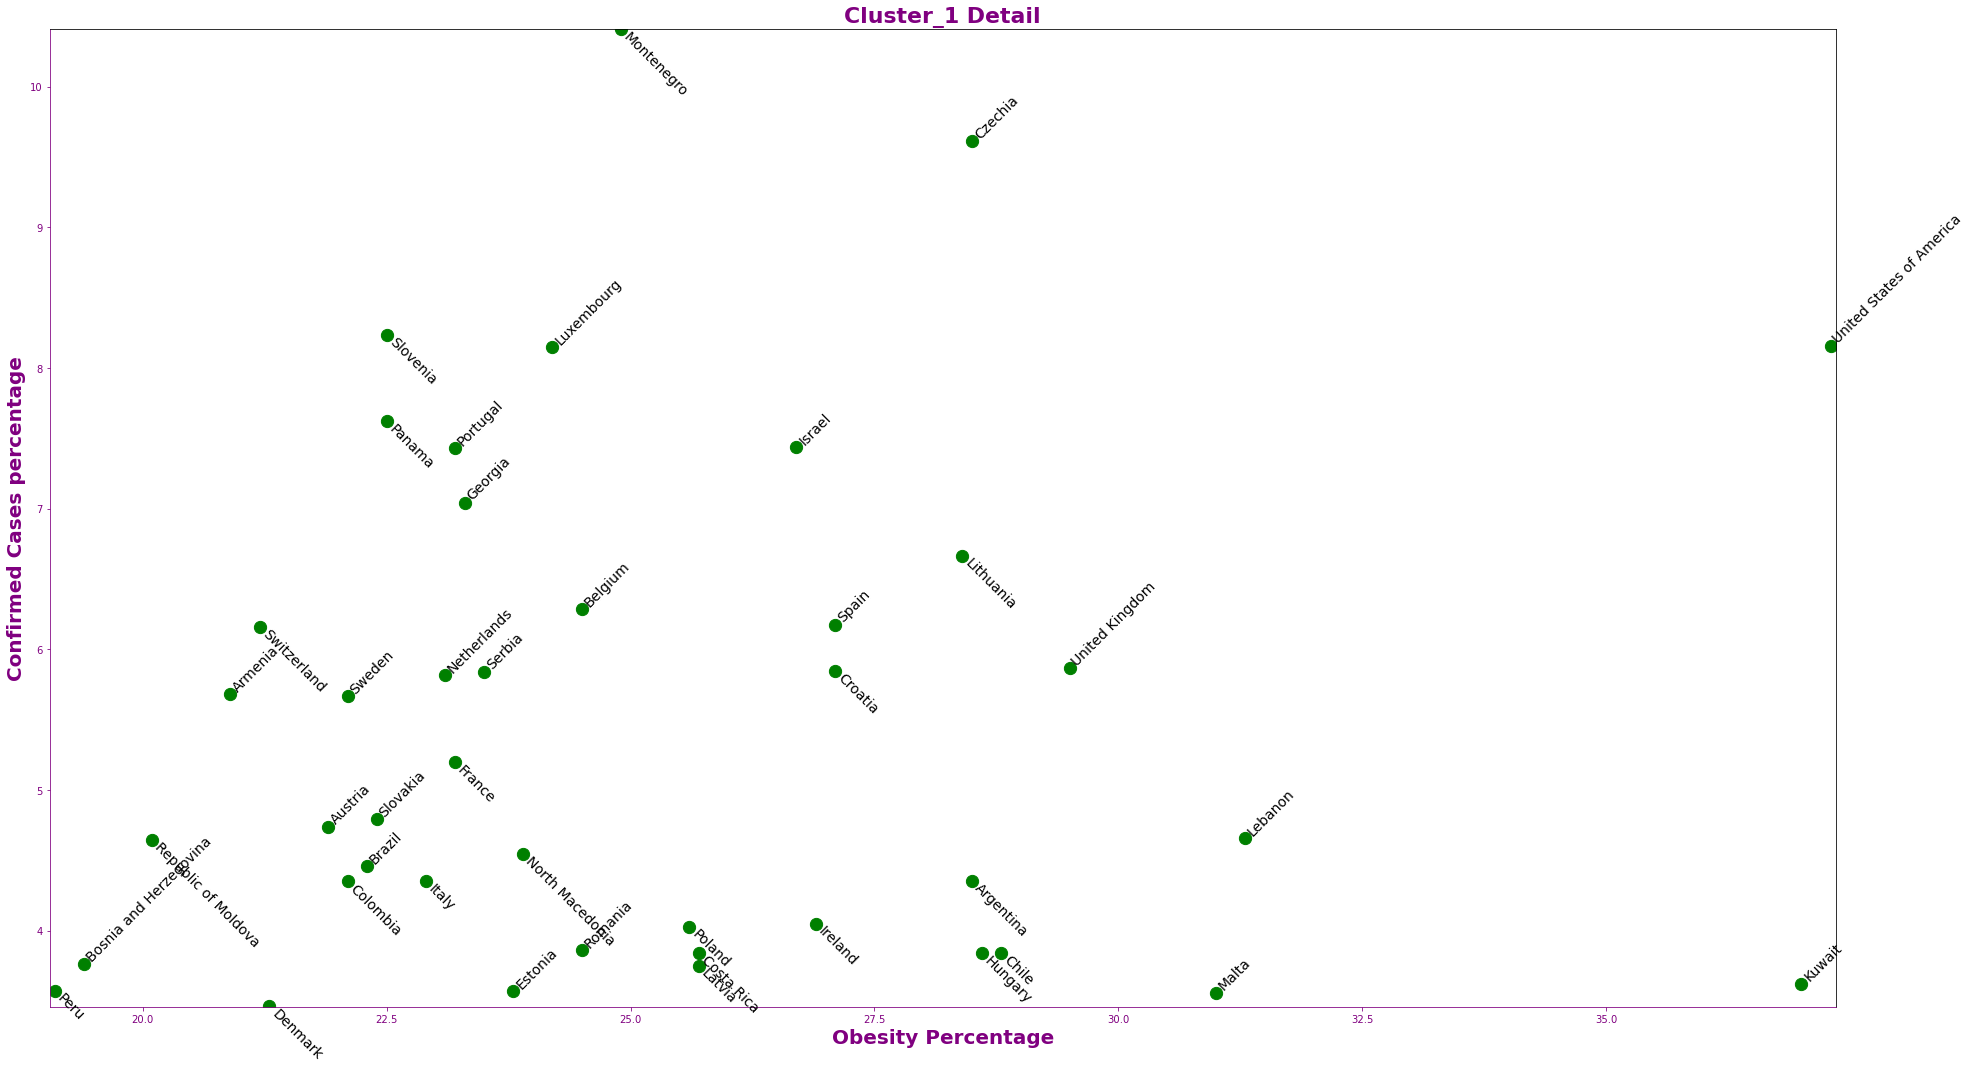

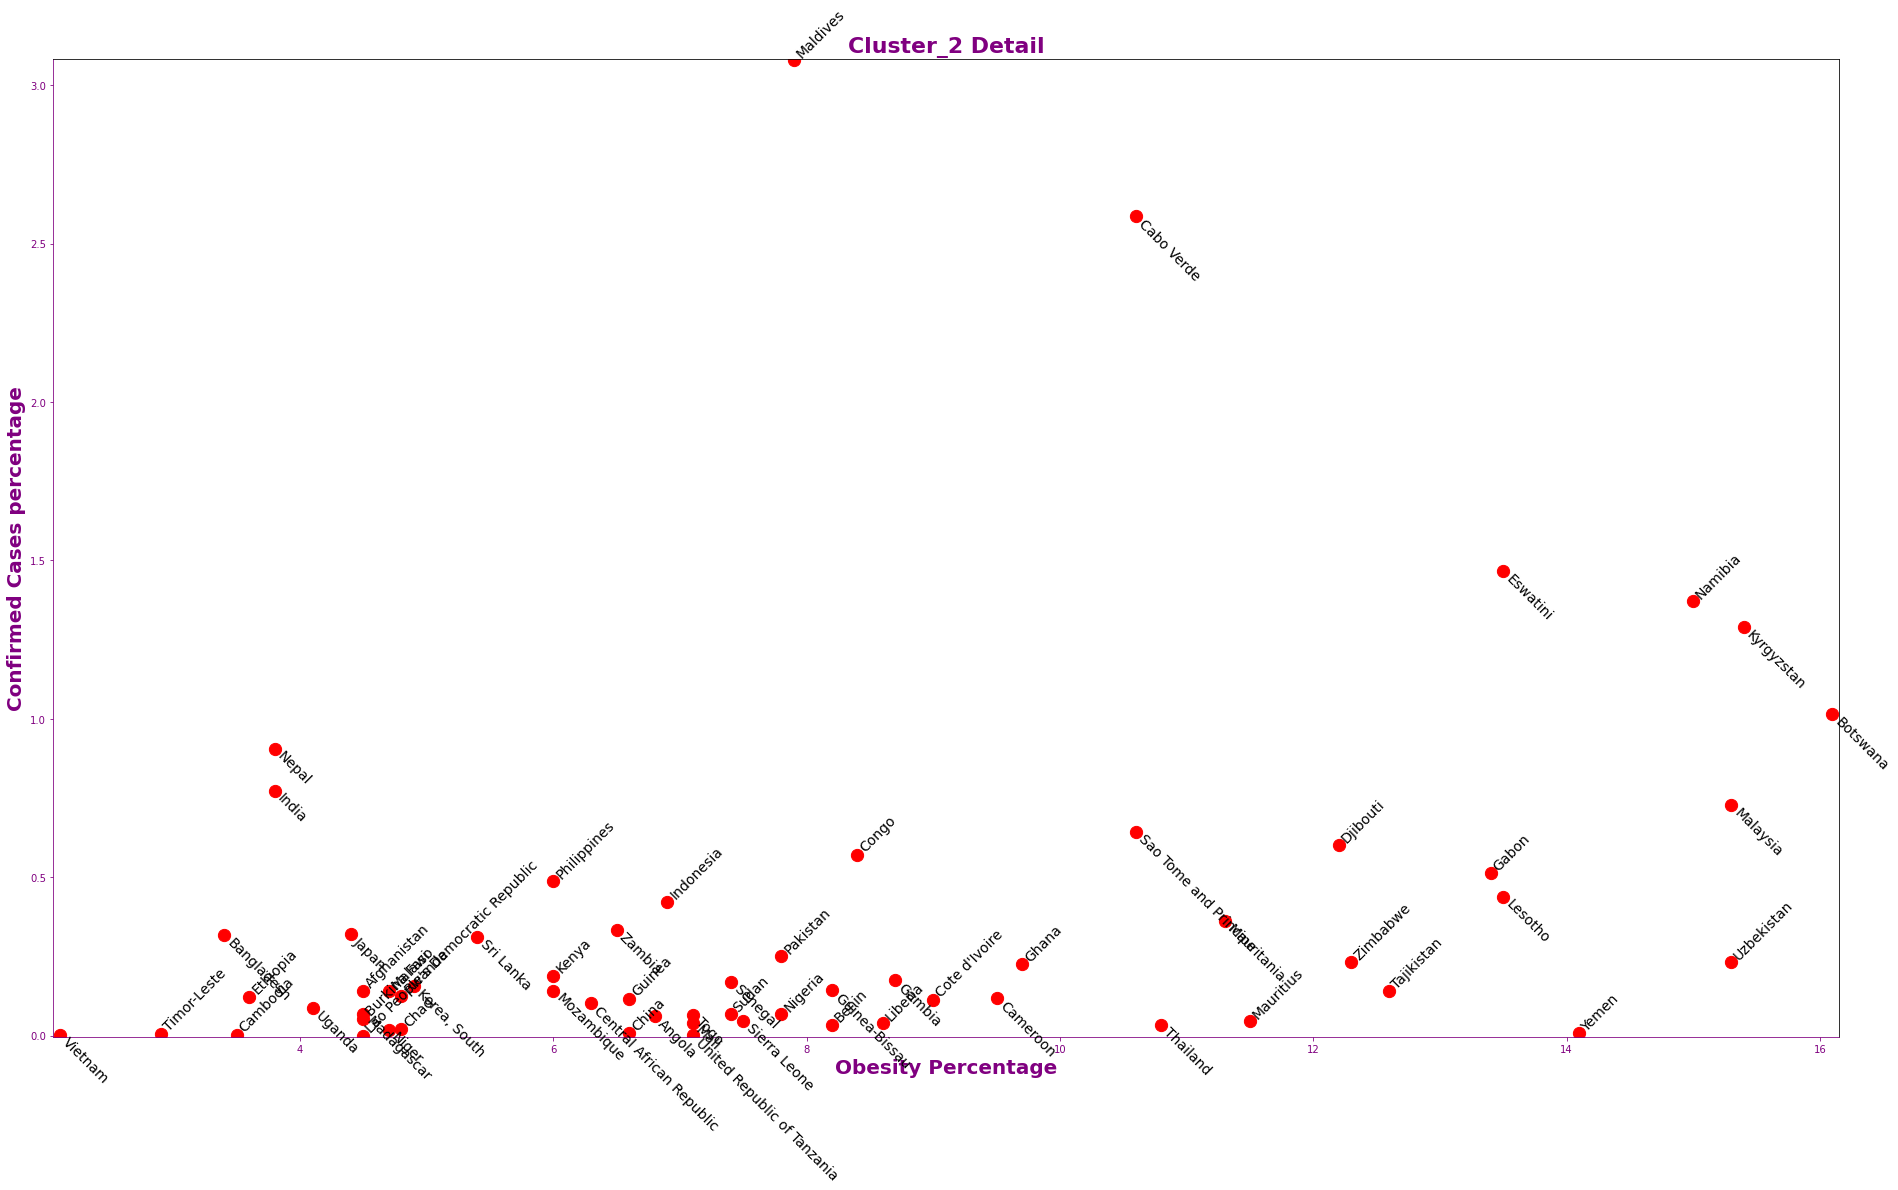

In [8]:
for j in range(0,num_opt_clusters):
    if j==1:
        colour = 'green'
    elif j==2:
        colour = 'red'
    elif j==0:
        colour = 'blue'
    else:
        print("Error:")
    
    axes = plt.gca()
    axes.set_xlim([min(X[y_kmeans==j,0])-.05,max(X[y_kmeans==j,0])+.05])
    axes.set_ylim([min(X[y_kmeans==j,1])-.005,max(X[y_kmeans==j,1])+.005])
    axes.spines["bottom"].set_color("purple")
    axes.spines["left"].set_color("purple")
    axes.tick_params(axis='x', colors='purple')
    axes.tick_params(axis='y', colors='purple')

    for i in range (0,X.shape[0]):
        if y_kmeans[i] == j :
            plt.scatter(X[i,0], X[i,1], s = 150, c = colour)
            if i%2 == 1:
                plt.annotate(dataset.iloc[i, 0], (X[i,0], X[i,1]), fontsize=14,rotation=-45,va='top')
            else:
                plt.annotate(dataset.iloc[i, 0], (X[i,0], X[i,1]), fontsize=14,rotation=+45,va='bottom')
        
    plt.title('Cluster_' + str(j) + ' Detail',fontsize=22, fontweight='bold',c = 'purple')
    plt.xlabel('Obesity Percentage',fontsize=20, fontweight='bold',c = 'purple')
    plt.ylabel('Confirmed Cases percentage',fontsize=20, fontweight='bold',c = 'purple')
    
    
    figure = plt.gcf()  # get current figure
    figure.set_size_inches(32, 18) # set figure's size manually to your full screen (32x18)
    plt.show()
    #plt.savefig("Cluster"+str(j)+".png", bbox_inches='tight') # bbox_inches removes extra white spaces
    #plt.clf()

In [9]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
import matplotlib.cm as cm
import random
import scipy as sp

In [10]:
data = pd.read_csv("E:/Medium/2 Learned/COVID-19 Healthy Diet Dataset/Food_Supply_Quantity_kg_Data.csv")
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 170 entries, 0 to 169
Data columns (total 32 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Country                       170 non-null    object 
 1   Alcoholic Beverages           170 non-null    float64
 2   Animal fats                   170 non-null    float64
 3   Animal Products               170 non-null    float64
 4   Aquatic Products, Other       170 non-null    float64
 5   Cereals - Excluding Beer      170 non-null    float64
 6   Eggs                          170 non-null    float64
 7   Fish, Seafood                 170 non-null    float64
 8   Fruits - Excluding Wine       170 non-null    float64
 9   Meat                          170 non-null    float64
 10  Milk - Excluding Butter       170 non-null    float64
 11  Miscellaneous                 170 non-null    float64
 12  Offals                        170 non-null    float64
 13  Oilcr

In [11]:
data.describe()

,Alcoholic Beverages,Animal fats,Animal Products,"Aquatic Products, Other",Cereals - Excluding Beer,Eggs,"Fish, Seafood",Fruits - Excluding Wine,Meat,Milk - Excluding Butter,...,Treenuts,Vegetable Oils,Vegetables,Vegetal Products,Obesity,Confirmed,Deaths,Recovered,Active,Population
count,170.000000,170.000000,170.000000,170.000000,170.000000,170.000000,170.000000,170.000000,170.000000,170.000000,...,170.000000,170.000000,170.000000,170.000000,167.000000,164.000000,164.000000,164.000000,162.000000,1.700000e+02
mean,3.022971,0.221064,12.181871,0.013994,11.800347,0.470570,1.387195,5.621405,3.375934,6.519776,...,0.117474,0.851554,6.085912,37.814834,18.707784,2.021972,0.039370,1.452356,0.535158,4.452364e+07
std,2.382243,0.278304,5.852635,0.129382,5.824870,0.331209,1.257382,3.152849,1.762911,5.020379,...,0.146143,0.445335,3.560148,5.852943,9.633557,2.360454,0.048718,1.927617,1.329249,1.564182e+08
min,0.000000,0.001000,1.739100,0.000000,3.401400,0.023900,0.034200,0.659600,0.356000,0.096300,...,0.000000,0.091500,0.857000,23.113200,2.100000,0.000312,0.000000,0.000000,0.000000,5.400000e+04
25%,0.895625,0.040225,7.236850,0.000000,7.226850,0.187575,0.557100,3.541950,1.891475,2.172250,...,0.020750,0.507700,3.616500,33.552775,8.500000,0.140976,0.002013,0.099107,0.012028,2.816250e+06
50%,2.866150,0.116850,12.097550,0.000000,10.142750,0.460150,1.029250,5.021250,3.424750,5.336900,...,0.079950,0.774450,5.028100,37.900700,21.200000,1.011570,0.011998,0.475402,0.081040,1.018150e+07
75%,4.710950,0.253900,16.444125,0.001400,15.148950,0.644150,1.821275,6.827750,4.422450,10.407100,...,0.148650,1.070900,7.801650,42.762775,25.700000,3.487069,0.069503,2.622874,0.358183,3.271625e+07
max,15.370600,1.355900,26.886500,1.679400,29.804500,1.696000,8.795900,19.302800,8.170000,20.837800,...,0.756900,2.202600,19.299500,48.258500,45.600000,10.408199,0.185428,9.039871,8.019819,1.402385e+09


<ipython-input-12-76c0f0008759>:5: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  ax.figure.show()


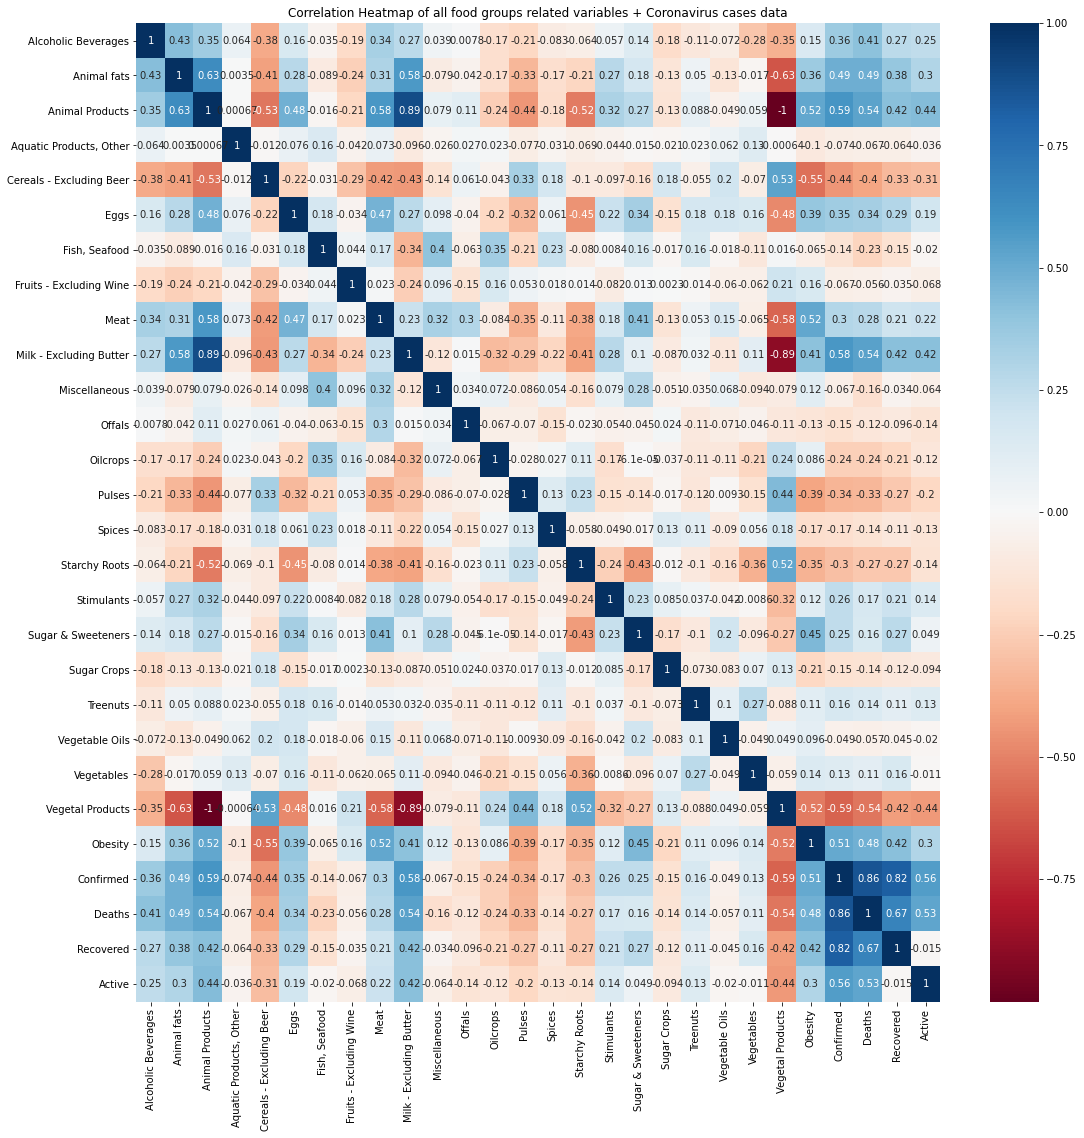

In [12]:
corr = data.loc[:, "Alcoholic Beverages":"Active"].drop("Undernourished", axis=1).corr()
plt.figure(figsize=(18,18))
ax = sb.heatmap(corr, cmap="RdBu", annot=True,)
ax.set_title("Correlation Heatmap of all food groups related variables + Coronavirus cases data")
ax.figure.show()


Distribution of food groups consumption

In this case we compare the difference in the groups most consumed by two different groups:

    Europe: the average of the values for Italy, Spain and the UK.
    East-Asia: the average of the values for Japan, South Korea, and the Philippines.

We can observe that, on average, the European group consumes more animal products (e.g. milk, egs, meat) than the East-Asian group while the latter compensates by consuming more plant-based produce (e.g. cereals, vegetables).


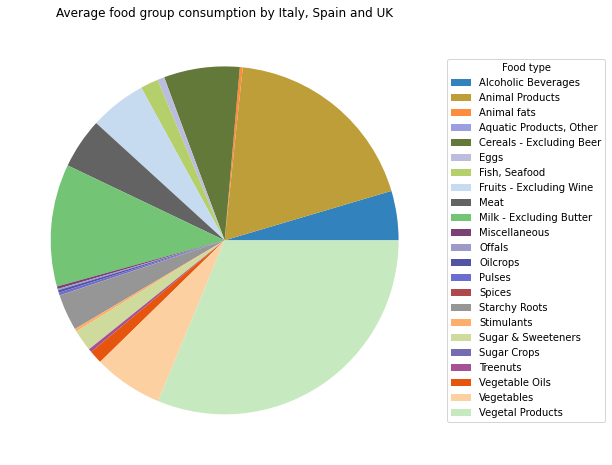

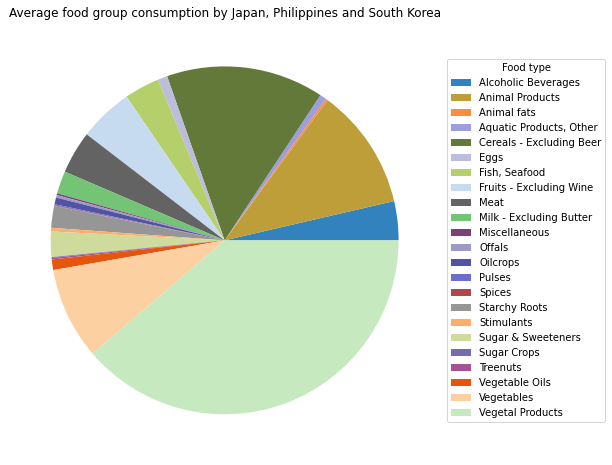

In [13]:
# Random seed
random.seed(7)

# Spain data
plt.figure(figsize=(8,8))
diet_europe = data.loc[[141, 74, 159], "Alcoholic Beverages":"Vegetal Products"].sort_index(axis=1)
colors = random.sample(list(cm.tab20b.colors) + list(cm.tab20c.colors),k = diet_europe.shape[1])
wedges, texts = plt.pie(diet_europe.mean().values.reshape(-1), colors=colors)
plt.legend(wedges, diet_europe.columns,
          title="Food type",
          loc="center left",
          bbox_to_anchor=(1, 0, 0.5, 1))
plt.title("Average food group consumption by Italy, Spain and UK")
plt.show()
# South Korea data
plt.figure(figsize=(8,8))
diet_east_asia = data.loc[[76, 82, 121], "Alcoholic Beverages":"Vegetal Products"].sort_index(axis=1)
wedges, texts = plt.pie(diet_east_asia.mean().values.reshape(-1), colors=colors)
plt.legend(wedges, diet_east_asia.columns,
          title="Food type",
          loc="center left",
          bbox_to_anchor=(1, 0, 0.5, 1))
plt.title("Average food group consumption by Japan, Philippines and South Korea")
plt.show()

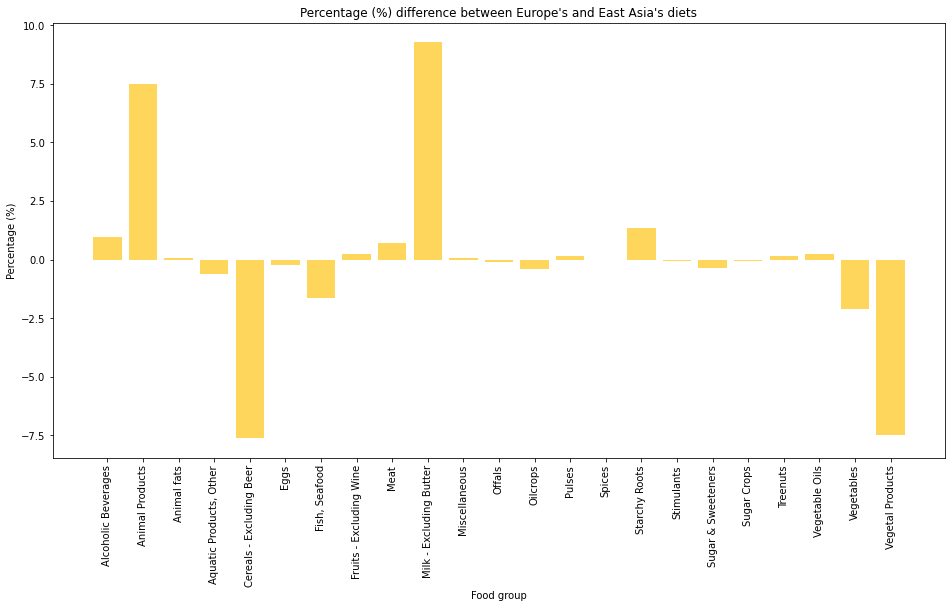

In [14]:
# Differences in percentage on the types of foods consumed
plt.figure(figsize=(16,8))
plt.bar(diet_europe.columns, (diet_europe.mean().values-diet_east_asia.mean().values).reshape(-1), color="#ffd65c")
plt.xticks(rotation='vertical')
plt.title("Percentage (%) difference between Europe's and East Asia's diets")
plt.xlabel("Food group")
plt.ylabel("Percentage (%)")
plt.show()

Animal Products Consumption

Here the consumption of animal products is divided in three groups, depending on how much (%) of the overall diet it represents:

    0 - 10%: Low
    10 - 20%: Medium
    20 - 30%: High

In the box plot below representing the obesity rate grouped by the animal products consumption we can observe that the higher the amount of animal products that are in the diet, the higher the average obesity rate of these countries, which might indicate that there's a correlation.

In [15]:
data["recovered"] = (data["Recovered"]/data["Confirmed"])*100
data["deaths"] = (data["Deaths"]/data["Confirmed"])*100
data["active"] = (data["Active"]/data["Confirmed"])*100

data["AP Consumption"] = pd.cut(data["Animal Products"], [0, 10, 20, 30], labels=["low", "medium", "high"])

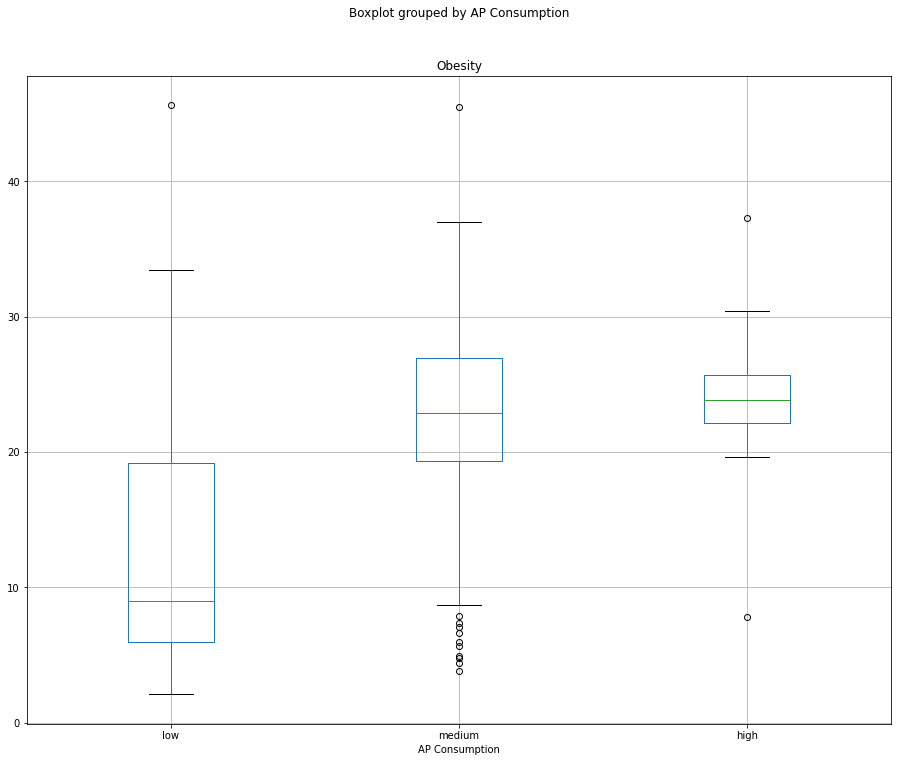

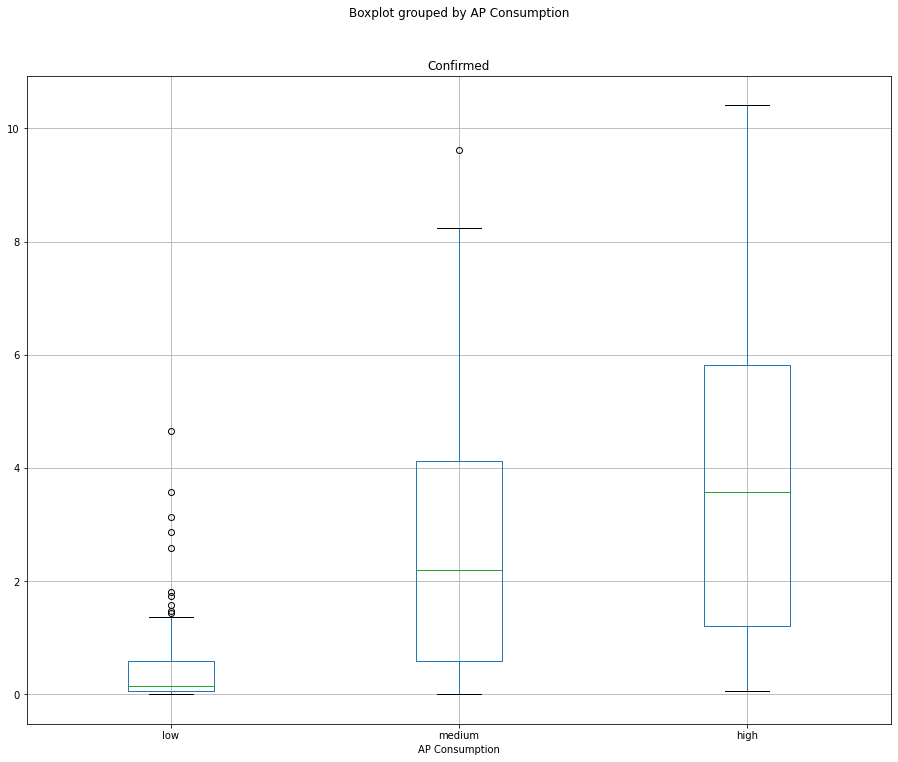

In [16]:
data.boxplot(column=["Obesity"], by="AP Consumption", figsize=(15,12))
data.boxplot(column=["Confirmed"], by="AP Consumption", figsize=(15,12))
plt.show()

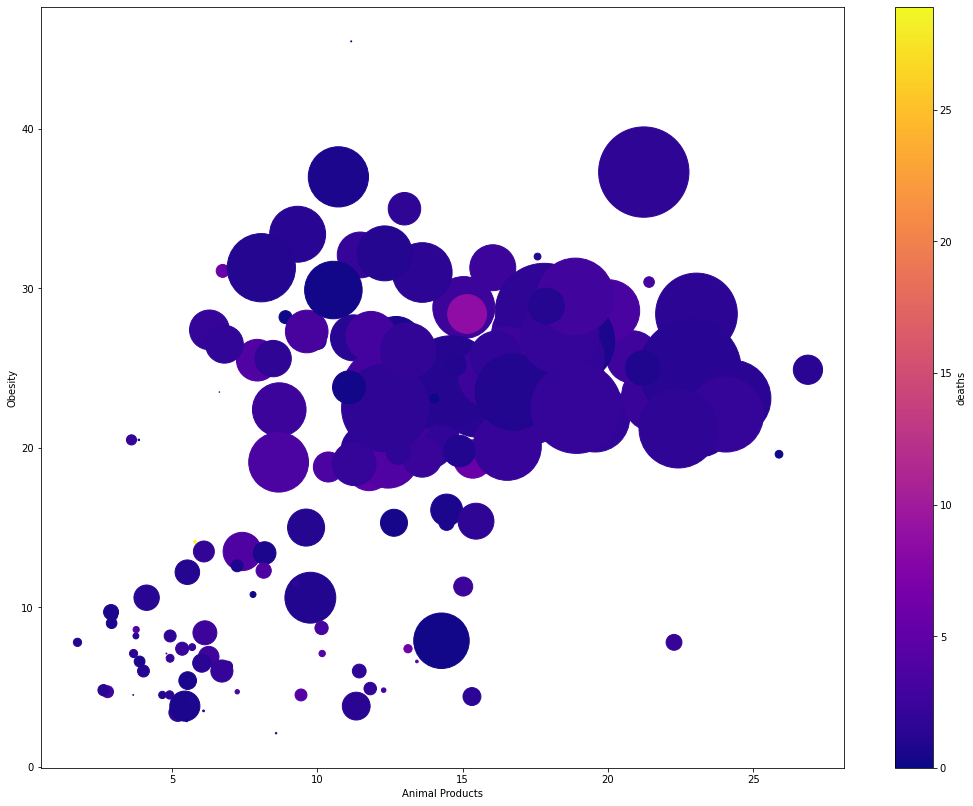

In [17]:
fig, ax = plt.subplots()
data.plot(kind='scatter', x='Animal Products', y='Obesity', s=data["Confirmed"]*1000, c='deaths', cmap='plasma', figsize=(18,14), ax=ax) 
plt.show()